In [177]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re

# for text processing
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
nltk.download('punkt')

import string

from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nizardeen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nizardeen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [178]:
df_train_data = pd.read_excel('Data_Train.xlsx')
df_test_data = pd.read_excel('Data_Test.xlsx')


In [179]:
df_train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [180]:
df_test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [181]:
df_test_data.drop_duplicates(keep=False,inplace=True)

In [182]:
df = pd.concat([df_train_data,df_test_data],sort=False)

In [183]:
df.isna().sum()

Title              0
Author             0
Edition            0
Reviews            0
Ratings            0
Synopsis           0
Genre              0
BookCategory       0
Price           1544
dtype: int64

In [184]:
df.isnull().sum()

Title              0
Author             0
Edition            0
Reviews            0
Ratings            0
Synopsis           0
Genre              0
BookCategory       0
Price           1544
dtype: int64

In [185]:
df.columns = map(str.lower,df.columns)

In [186]:
dfd = df

In [187]:
title_counter_val = Counter([data for data in df.title])
# title_counter_val

Counter({"The Prisoner's Gold (The Hunters 3)": 1,
         'Guru Dutt: A Tragedy in Three Acts': 2,
         'Leviathan (Penguin Classics)': 3,
         'A Pocket Full of Rye (Miss Marple)': 1,
         'LIFE 70 Years of Extraordinary Photography': 1,
         'ChiRunning: A Revolutionary Approach to Effortless, Injury-Free Running': 1,
         'Death on the Nile (Poirot)': 1,
         'Yoga Your Home Practice Companion: A Complete Practice and Lifestyle Guide: Yoga Programmes, Meditation Exercises, and Nourishing Recipes (Sivananda Yoga Vedanta Centre)': 2,
         'Karmayogi: A Biography of E. Sreedharan': 1,
         'The Iron King (The Accursed Kings, Book 1)': 3,
         'Battle for Sanskrit: Is Sanskrit Political or Sacred? Oppressive or Liberating? Dead or Alive?': 1,
         'Blockchain Revolution: How the Technology Behind Bitcoin and Other Cryptocurrencies is Changing the World': 1,
         'Tai-Pan: The Second Novel of the Asian Saga': 1,
         'The Art of Shaolin K

In [188]:
dfd.author.value_counts()

Agatha Christie                 87
Ladybird                        63
DK                              61
Albert Uderzo                   48
Nora Roberts                    40
                                ..
John Gottman PhD, Nan Silver     1
Graham Bowley                    1
Varsha Adusumilli                1
Yuxi (Hayden) Liu                1
Betty Neels                      1
Name: author, Length: 4371, dtype: int64

In [189]:
dfd.reviews.unique()

array(['4.0 out of 5 stars', '3.9 out of 5 stars', '4.8 out of 5 stars',
       '4.1 out of 5 stars', '5.0 out of 5 stars', '4.5 out of 5 stars',
       '4.4 out of 5 stars', '4.7 out of 5 stars', '4.2 out of 5 stars',
       '4.9 out of 5 stars', '3.5 out of 5 stars', '3.8 out of 5 stars',
       '4.3 out of 5 stars', '3.1 out of 5 stars', '4.6 out of 5 stars',
       '2.0 out of 5 stars', '3.7 out of 5 stars', '3.2 out of 5 stars',
       '2.6 out of 5 stars', '2.8 out of 5 stars', '3.4 out of 5 stars',
       '2.9 out of 5 stars', '3.3 out of 5 stars', '3.0 out of 5 stars',
       '2.5 out of 5 stars', '1.0 out of 5 stars', '3.6 out of 5 stars',
       '2.7 out of 5 stars', '1.5 out of 5 stars', '2.3 out of 5 stars',
       '1.7 out of 5 stars', '2.2 out of 5 stars', '1.4 out of 5 stars',
       '2.4 out of 5 stars', '1.6 out of 5 stars', '2.1 out of 5 stars'],
      dtype=object)

In [190]:
dfd['reviews']=dfd['reviews'].apply(lambda x : x[:3])
# dfd.reviews.unique()

# dfd.loc[dfd['reviews'].str.contains('')]

In [191]:
dfd['ratings'] = dfd.ratings.str.strip('customer reviews')

In [192]:
dfd['ratings'] = dfd.ratings.str.replace(',','')

In [193]:
dfd.head()

,title,author,edition,reviews,ratings,synopsis,genre,bookcategory,price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [194]:
# dfd.genre.unique()

In [195]:
dfd.bookcategory.unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [196]:
dfd[['edition_type','date']] = dfd.edition.str.split(',–',n=1,expand=True)

In [197]:
dfd.head()

,title,author,edition,reviews,ratings,synopsis,genre,bookcategory,price,edition_type,date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10 Mar 2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25 Feb 1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006


In [198]:
date_counter = Counter([b for b in dfd.date])

In [199]:
# date_counter

Counter({' 10 Mar 2016': 4,
         ' 7 Nov 2012': 4,
         ' 25 Feb 1982': 3,
         ' 5 Oct 2017': 60,
         ' 10 Oct 2006': 1,
         ' 5 May 2009': 6,
         ' Import, 1 Mar 2018': 8,
         ' 15 Dec 2015': 3,
         ' 26 Mar 2013': 10,
         ' 20 Jan 2017': 2,
         ' Import, 14 Jun 2018': 5,
         ' 1 Jul 1999': 2,
         ' 15 Nov 2002': 1,
         ' 1 Sep 2011': 19,
         ' 26 Feb 2015': 5,
         ' 8 Mar 2018': 4,
         ' 1 Nov 2016': 8,
         ' 1 Jan 1991': 2,
         ' 2016': 60,
         ' 24 Nov 2018': 5,
         ' Import, 4 Oct 2018': 7,
         ' 5 Jul 2012': 7,
         ' 1 Nov 2014': 3,
         ' 31 Aug 2012': 1,
         ' Deckle Edge, 18 Oct 2011': 1,
         ' 1 Mar 2016': 11,
         ' Box set, 15 Jun 2014': 2,
         ' 15 Sep 2014': 1,
         ' 23 Apr 1989': 1,
         ' 21 Nov 2013': 3,
         ' 21 Jul 2015': 2,
         ' 14 Oct 2000': 20,
         ' 5 Sep 2005': 16,
         ' 10 May 2016': 5,
         ' 2019'

In [200]:
dfd['year'] = dfd.date.apply(lambda x : x[-4:] if x[-1].isdigit() else np.nan)

In [201]:
dfd.year.unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', nan, '1997', '1995', '1987',
       '1986', '1990', '1988', '1981', '1976', '1994', '1998', '1977',
       '1974', '1983', '1971', '1985', '1978', '1964', '1984', '1980',
       '1979', '1960', '1970', '1975', '1905', '1900', '1961', '1925',
       '1973', '1942', '1972'], dtype=object)

In [202]:
months_lst = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [203]:
def togetmonth(text):
   text = text.lstrip()
   if ',' in text:
    text = text.split(',')[1].lstrip()
    return text[-8:-5]
   else:
    text = text.lstrip()
    return text[-8:-5]

In [204]:
dfd['month'] = dfd.date.apply(lambda x : togetmonth(x) if x[-1].isdigit() else np.nan)

In [205]:
dfd.month.replace({'':np.nan},inplace=True)

In [206]:
dfd.month.mode()[0]

'Oct'

In [207]:
dfd.month.fillna(dfd.month.mode()[0],inplace=True)

In [208]:
dfd.month.unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', 'Aug', 'Apr'], dtype=object)

In [209]:
dfd.head()

,title,author,edition,reviews,ratings,synopsis,genre,bookcategory,price,edition_type,date,year,month
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,Paperback,10 Mar 2016,2016,Mar
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,Paperback,7 Nov 2012,2012,Nov
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25 Feb 1982,1982,Feb
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,Paperback,5 Oct 2017,2017,Oct
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,Hardcover,10 Oct 2006,2006,Oct


In [210]:
dfd.edition_type.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       '(Kannada),Paperback', 'Product Bundle', 'Library Binding',
       '(German),Paperback', 'Leather Bound', '(French),Paperback',
       '(Spanish),Paperback', '(Chinese),Paperback'], dtype=object)

In [211]:
def togeteditiontype(text):
    text = text.strip()
    if 'Paperback' in text:
        return 'Paperback'
    elif 'Hardcover' in text:
        return 'Hardcover'
    else:
        return 'Other'

In [212]:
dfd['edition_types'] = dfd.edition.apply(togeteditiontype)

In [213]:
dfd.edition_types.unique()

array(['Paperback', 'Hardcover', 'Other'], dtype=object)

In [214]:
dfd.drop(['edition','date','edition_type'],axis=1,inplace=True)

In [215]:
dfd.head()

,title,author,reviews,ratings,synopsis,genre,bookcategory,price,year,month,edition_types
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,2016,Mar,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012,Nov,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,1982,Feb,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017,Oct,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,2006,Oct,Hardcover


In [216]:
syn_counter = Counter([b for b in dfd.synopsis])

In [218]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

In [219]:
dfd['synopsis'] = dfd.synopsis.apply(clean_text)

In [220]:
# synopsis number of words
dfd['syn_num_words'] = dfd.synopsis.apply(lambda a: len(str(a).split()))

In [221]:
# number of unique words in synopsis
dfd['syn_unique_words'] = dfd.synopsis.apply(lambda b : len(set(str(b).split())))

In [222]:
# number of characters in synopsis data
dfd['syn_charac_words'] = dfd.synopsis.apply(lambda c: len(str(c)))

In [223]:
# number of stopwords in the sentence
dfd['syn_stop_words'] = dfd.synopsis.apply(lambda d: len([a for a in str(d).lower().split() if a in stop_words]))

In [224]:
# number of punctuations in the sentence
dfd['syn_punctuation'] = dfd.synopsis.apply(lambda e: len([a for a in str(e) if a in string.punctuation]))

In [225]:
# Number of title case words in the Synopsis ##
dfd['syn_words_upper'] = dfd.synopsis.apply(lambda f : len([a for a in str(f).split() if a.isupper()]))

In [226]:
# Number of title case words in the Synopsis ##
dfd['syn_title_upper'] = dfd.synopsis.apply(lambda g : len([a for a in str(g).split() if a.istitle()]))

In [227]:
# mean length of words in synopsis
dfd['syn_mean_word_len'] = dfd.synopsis.apply(lambda h : np.mean([len(a) for a in str(h).split()]))

In [229]:
dfd.head()

,title,author,reviews,ratings,synopsis,genre,bookcategory,price,year,month,edition_types,syn_num_words,syn_unique_words,syn_charac_words,syn_stop_words,syn_punctuation,syn_words_upper,syn_title_upper,syn_mean_word_len
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,the hunters return their third brilliant novel...,Action & Adventure (Books),Action & Adventure,220.00,2016,Mar,Paperback,112,87,705,37,0,0,0,5.303571
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,layered portrait troubled genius for whom art ...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012,Nov,Paperback,159,110,1032,40,0,0,0,5.496855
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,during the time men live without common power ...,International Relations,Humour,299.00,1982,Feb,Paperback,211,157,1482,66,0,0,0,6.028436
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,handful grain found the pocket murdered busine...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017,Oct,Paperback,54,47,353,16,0,0,0,5.555556
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,for seven decades life has been thrilling the ...,Photography Textbooks,"Arts, Film & Photography",965.62,2006,Oct,Hardcover,88,66,586,33,0,0,0,5.670455


In [230]:
# synopsis number of words
dfd['title_num_words'] = dfd.title.apply(lambda a: len(str(a).split()))

In [231]:
# number of unique words in synopsis
dfd['title_unique_words'] = dfd.title.apply(lambda b : len(set(str(b).split())))

In [232]:
# number of characters in synopsis data
dfd['title_charac_words'] = dfd.title.apply(lambda c: len(str(c)))

In [233]:
# number of stopwords in the sentence
dfd['title_stop_words'] = dfd.title.apply(lambda d: len([a for a in str(d).lower().split() if a in stop_words]))

In [234]:
# number of punctuations in the sentence
dfd['title_punctuation'] = dfd.title.apply(lambda e: len([a for a in str(e) if a in string.punctuation]))

In [235]:
# Number of title case words in the Synopsis ##
dfd['title_words_upper'] = dfd.title.apply(lambda f : len([a for a in str(f).split() if a.isupper()]))

In [236]:
# Number of title case words in the Synopsis ##
dfd['title_title_upper'] = dfd.title.apply(lambda g : len([a for a in str(g).split() if a.istitle()]))

In [237]:
# mean length of words in synopsis
dfd['title_mean_word_len'] = dfd.title.apply(lambda h : np.mean([len(a) for a in str(h).split()]))

In [238]:
dfd.head()

,title,author,reviews,ratings,synopsis,genre,bookcategory,price,year,month,...,syn_title_upper,syn_mean_word_len,title_num_words,title_unique_words,title_charac_words,title_stop_words,title_punctuation,title_words_upper,title_title_upper,title_mean_word_len
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,4.0,8,the hunters return their third brilliant novel...,Action & Adventure (Books),Action & Adventure,220.00,2016,Mar,...,0,5.303571,6,6,35,1,3,0,4,5.000000
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,3.9,14,layered portrait troubled genius for whom art ...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,2012,Nov,...,0,5.496855,7,7,34,2,1,1,6,4.000000
2,Leviathan (Penguin Classics),Thomas Hobbes,4.8,6,during the time men live without common power ...,International Relations,Humour,299.00,1982,Feb,...,0,6.028436,3,3,28,0,2,0,3,8.666667
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,4.1,13,handful grain found the pocket murdered busine...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,2017,Oct,...,0,5.555556,7,7,34,2,2,1,6,4.000000
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,5.0,1,for seven decades life has been thrilling the ...,Photography Textbooks,"Arts, Film & Photography",965.62,2006,Oct,...,0,5.670455,6,6,42,1,0,1,3,6.166667


In [239]:
author_counter = Counter([a for a in dfd.author])

In [240]:
# author_counter

Counter({'Chris Kuzneski': 4,
         'Arun Khopkar': 2,
         'Thomas Hobbes': 3,
         'Agatha Christie': 87,
         'Editors of Life': 1,
         'Danny Dreyer': 3,
         'Sivananda Yoga Vedanta Centre': 3,
         'M S Ashokan': 1,
         'Maurice Druon': 3,
         'Rajiv Malhotra': 2,
         'Don Tapscott, Alex Tapscott': 1,
         'James Clavell': 7,
         'Wong Kiew Kit': 1,
         'Michael Ondaatje': 4,
         'Matthew K Manning': 1,
         'Charlotte Guillain, Roland Dry': 1,
         'Takashi Yano': 2,
         'Will Durant': 1,
         'Davy Cielen, Arno D.B. Meysman, Mohamed Ali': 1,
         'Hiro Arikawa': 2,
         'Luca Caioli': 13,
         'Mario Puzo': 7,
         'Murugesan Ramaswamy': 1,
         'Jenny Russ': 1,
         'Robert Neuwirth': 1,
         'Shantanu Guha Ray': 1,
         'Osamu Tezuka': 7,
         'Brian Shields': 1,
         'C. G. Jung, Aniela Jaffe, Clara Winston, Richard Winston': 1,
         'David Baldacci': 26

In [241]:
dfd.author.value_counts()

Agatha Christie                 87
Ladybird                        63
DK                              61
Albert Uderzo                   48
Nora Roberts                    40
                                ..
John Gottman PhD, Nan Silver     1
Graham Bowley                    1
Varsha Adusumilli                1
Yuxi (Hayden) Liu                1
Betty Neels                      1
Name: author, Length: 4371, dtype: int64

In [242]:
dfd.bookcategory.unique()

array(['Action & Adventure', 'Biographies, Diaries & True Accounts',
       'Humour', 'Crime, Thriller & Mystery', 'Arts, Film & Photography',
       'Sports', 'Language, Linguistics & Writing',
       'Computing, Internet & Digital Media', 'Romance',
       'Comics & Mangas', 'Politics'], dtype=object)

In [243]:
dfd.bookcategory.value_counts()

Action & Adventure                      1020
Crime, Thriller & Mystery                878
Comics & Mangas                          744
Language, Linguistics & Writing          733
Biographies, Diaries & True Accounts     732
Romance                                  702
Humour                                   670
Computing, Internet & Digital Media      648
Arts, Film & Photography                 638
Sports                                   614
Politics                                 402
Name: bookcategory, dtype: int64

In [244]:
def getBookCategory(text):
    fiction_lst = ['Action & Adventure','Crime, Thriller & Mystery','Comics & Mangas','Romance','Arts, Film & Photography','Humour']
    non_fiction_lst = ['Language, Linguistics & Writing','Biographies, Diaries & True Accounts','Computing, Internet & Digital Media','Sports','Politics']
    text = text.strip()
    if text in fiction_lst:
        return 'Fiction'
    elif text in non_fiction_lst:
        return 'Non-Fiction'

In [245]:
dfd['bookcategory']=dfd.bookcategory.apply(getBookCategory)

In [246]:
dfd.bookcategory.unique()

array(['Fiction', 'Non-Fiction'], dtype=object)

In [247]:
dfd.drop(['title','synopsis','genre'],axis='columns',inplace=True)

In [248]:
dfd.head()

,author,reviews,ratings,bookcategory,price,year,month,edition_types,syn_num_words,syn_unique_words,...,syn_title_upper,syn_mean_word_len,title_num_words,title_unique_words,title_charac_words,title_stop_words,title_punctuation,title_words_upper,title_title_upper,title_mean_word_len
0,Chris Kuzneski,4.0,8,Fiction,220.00,2016,Mar,Paperback,112,87,...,0,5.303571,6,6,35,1,3,0,4,5.000000
1,Arun Khopkar,3.9,14,Non-Fiction,202.93,2012,Nov,Paperback,159,110,...,0,5.496855,7,7,34,2,1,1,6,4.000000
2,Thomas Hobbes,4.8,6,Fiction,299.00,1982,Feb,Paperback,211,157,...,0,6.028436,3,3,28,0,2,0,3,8.666667
3,Agatha Christie,4.1,13,Fiction,180.00,2017,Oct,Paperback,54,47,...,0,5.555556,7,7,34,2,2,1,6,4.000000
4,Editors of Life,5.0,1,Fiction,965.62,2006,Oct,Hardcover,88,66,...,0,5.670455,6,6,42,1,0,1,3,6.166667


In [249]:
df.shape

(7781, 24)

In [250]:
month_cat_col = dfd.month.str.get_dummies()

In [251]:
dfd.edition_types.unique()

array(['Paperback', 'Hardcover', 'Other'], dtype=object)

In [252]:
labelencoder = LabelEncoder()
dfd['edition_types'] = labelencoder.fit_transform(df['edition_types'])

In [253]:
dfd['bookcategory'] = labelencoder.fit_transform(df['bookcategory'])

In [254]:
dfd.drop(['author','month'],axis=1,inplace=True)

In [255]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7781 entries, 0 to 1559
Data columns (total 22 columns):
reviews                7781 non-null object
ratings                7781 non-null object
bookcategory           7781 non-null int64
price                  6237 non-null float64
year                   7751 non-null object
edition_types          7781 non-null int64
syn_num_words          7781 non-null int64
syn_unique_words       7781 non-null int64
syn_charac_words       7781 non-null int64
syn_stop_words         7781 non-null int64
syn_punctuation        7781 non-null int64
syn_words_upper        7781 non-null int64
syn_title_upper        7781 non-null int64
syn_mean_word_len      7780 non-null float64
title_num_words        7781 non-null int64
title_unique_words     7781 non-null int64
title_charac_words     7781 non-null int64
title_stop_words       7781 non-null int64
title_punctuation      7781 non-null int64
title_words_upper      7781 non-null int64
title_title_upper      778

In [256]:
dfd.reviews.astype('object').astype('float')

0       4.0
1       3.9
2       4.8
3       4.1
4       5.0
       ... 
1555    5.0
1556    3.6
1557    4.0
1558    3.5
1559    4.5
Name: reviews, Length: 7781, dtype: float64

In [257]:
dfd.ratings.astype('int')

0        8
1       14
2        6
3       13
4        1
        ..
1555     4
1556    13
1557     5
1558     3
1559     2
Name: ratings, Length: 7781, dtype: int64

In [258]:
dfd.year.fillna(dfd.year.mode()[0],inplace=True)

In [262]:
dfd.isna().sum()

reviews                   0
ratings                   0
bookcategory              0
price                  1544
year                      0
edition_types             0
syn_num_words             0
syn_unique_words          0
syn_charac_words          0
syn_stop_words            0
syn_punctuation           0
syn_words_upper           0
syn_title_upper           0
syn_mean_word_len         0
title_num_words           0
title_unique_words        0
title_charac_words        0
title_stop_words          0
title_punctuation         0
title_words_upper         0
title_title_upper         0
title_mean_word_len       0
dtype: int64

In [260]:
dfd.syn_mean_word_len.fillna(0,inplace=True)

In [263]:
train_preproccesed = dfd[dfd.price.notna()]

In [264]:
test_preproccesed = dfd[dfd.price.isna()]

In [265]:
train_preproccesed.shape

(6237, 22)

In [266]:
test_preproccesed.shape

(1544, 22)

In [269]:
X = train_preproccesed.drop(columns=['price'])

In [271]:
Y = train_preproccesed['price']

In [272]:
Y.shape

(6237,)

In [278]:
train_x , test_x, train_y, test_y = train_test_split(X,Y,test_size=0.30,random_state=30)

In [279]:
linear = LinearRegression()
linear.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [280]:
linear.coef_

array([ 9.76383664e+01, -2.37846944e-01, -6.07117106e+01, -4.47443199e+00,
       -2.25440955e+02, -8.86041531e-01, -2.38257447e+00,  5.16252715e-01,
       -3.47906466e+00, -2.84217094e-14, -4.26325641e-14,  7.10542736e-15,
        8.18950434e+01,  1.71267102e+01, -1.54796972e+01,  6.31196613e+00,
       -4.82186868e+01, -2.99948038e+01,  3.49630533e+00, -7.51822132e+00,
       -1.03887224e+01])

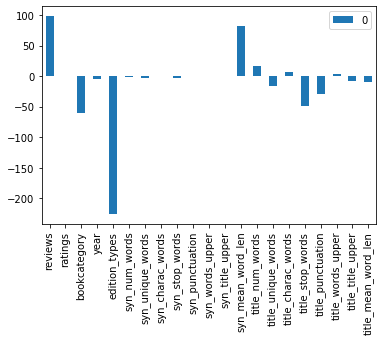

In [281]:
pd.DataFrame(linear.coef_,train_x.columns).plot(kind = "bar")

In [282]:
train_predict = linear.predict(train_x)

In [283]:
test_predict = linear.predict(test_x)

In [284]:
np.sqrt(mean_squared_error(train_predict,train_y))

630.5447254144158

In [285]:
np.sqrt(mean_squared_error(test_predict,test_y))

678.2993271654811

In [288]:
def model_fit(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
#     model.fit(train_X, train_y)
    
#     test_hack_predict = model.predict(test_X.drop(columns=["Item_Identifier","Outlet_Identifier"]))
#     test_pred_df = pd.DataFrame(test_hack_predict,columns= ["Item_Outlet_Sales"])
#     result = pd.concat([test_X[["Item_Identifier", "Outlet_Identifier"]],test_pred_df] ,axis = 1)
#     result.to_csv(filename,index = False)

In [318]:
lass = Lasso(alpha=0.1, normalize=True)

Train RMSE :  633.4610707375634
Test RMSE :  680.3554553487633


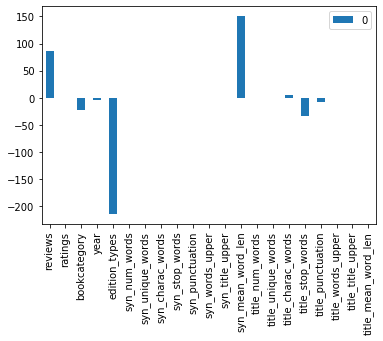

In [319]:
model_fit(lass,train_x,test_x,train_y,test_y,X,Y,test_preproccesed,"lasso_solution.csv")

Train RMSE :  632.42591633426
Test RMSE :  680.65497939597


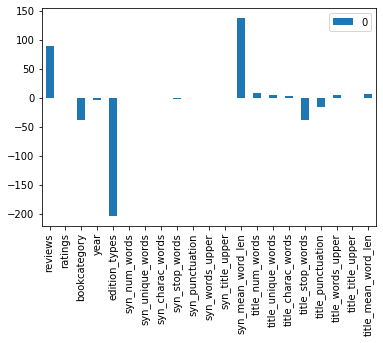

In [317]:
ridge = Ridge(alpha=0.1, normalize=True)
model_fit(ridge,train_x,test_x,train_y,test_y,X,Y,test_preproccesed,"ridge_solution.csv")

In [320]:
elastic = ElasticNet(alpha=0.2, l1_ratio=0.2, normalize=True)

Train RMSE :  673.9383712912676
Test RMSE :  725.5916585277995


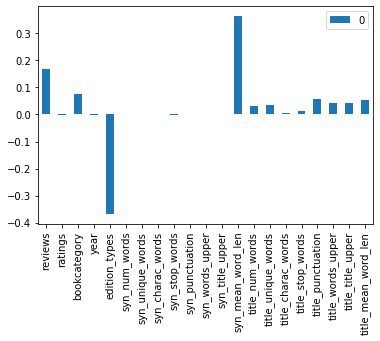

In [321]:
model_fit(elastic,train_x,test_x,train_y,test_y,X,Y,test_preproccesed,"ridge_solution.csv")

In [311]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100]).fit(train_x, train_y)
clf.score(X, Y) 

0.1252681680087746

In [312]:
clf.alpha_

100.0